# EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer


In [53]:
# Loading the data set
email_data = pd.read_csv(r"C:/Users/kavya/OneDrive/Desktop/Oasisinfo/DataScience/emailspamdetection/spam.csv",encoding = "ISO-8859-1")
email_data.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [54]:
email_data.shape


(5572, 5)

In [55]:
# Understanding the Data Variables
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [56]:
email_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [57]:
email_data.duplicated().sum()


403

In [58]:
email_data.drop_duplicates(keep = 'first', inplace = True)
email_data.shape

(5169, 5)

In [59]:
#Detecting missing values
email_data.isna().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [60]:
#Dropping unwanted Columns from data
email_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True )
email_data.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Data Visualization


In [61]:
# Finding the number of spam and non-spam mails in dataset
email_data['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

<AxesSubplot:title={'center':'Histogram of Spam and Ham'}, xlabel='v1'>

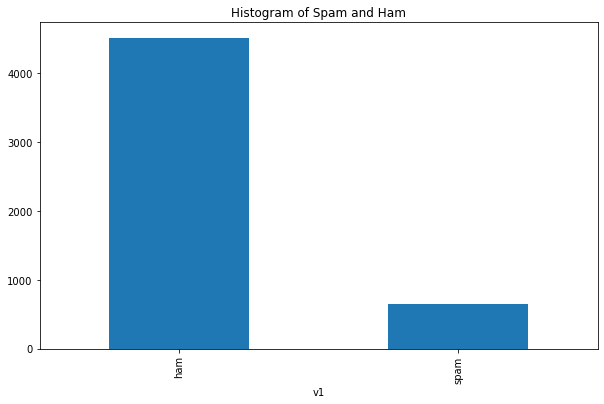

In [62]:
email_data['v1'].value_counts().plot(kind='bar',figsize=(10,6),title="Histogram of Spam and Ham",xlabel="v1")


In [63]:
# Printing examples of ham messages
print("Some examples of ham messages:")
print(email_data[email_data['v1'] == 'ham']['v2'].head())

Some examples of ham messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: v2, dtype: object


In [64]:
# Printing examples of spam messages
print(" Some examples of spam messages:")
print(email_data[email_data['v1'] == 'spam']['v2'].head())

 Some examples of spam messages:
2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: v2, dtype: object


In [65]:
# cleaning data 
import re
stop_words = []
# Load the custom built Stopwords
with open(r"C:/Users/kavya/OneDrive/Desktop/Oasisinfo/DataScience/emailspamdetection/stopwords_en.txt","r") as sw:
    stop_words = sw.read()

stop_words = stop_words.split("\n")
   
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

In [66]:
# testing above function with sample text => removes punctuations, numbers
cleaning_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")
cleaning_text("FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv")
email_data.text = email_data.v2.apply(cleaning_text)

C:\Users\kavya\AppData\Local\Temp\ipykernel_23236\2648371441.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  email_data.text = email_data.v2.apply(cleaning_text)


In [67]:
# removing empty rows
email_data = email_data.loc[email_data.text != " ",:]

In [68]:
# splitting data into train and test data sets 
from sklearn.model_selection import train_test_split

In [69]:
email_train, email_test = train_test_split(email_data, test_size = 0.2)


In [70]:
# creating a matrix of token counts for the entire text document 
def split_into_words(i):
    return [word for word in i.split(" ")]

In [71]:
# Defining the preparation of email texts into word count matrix format - Bag of Words
emails_bow = CountVectorizer(analyzer = split_into_words).fit(email_data.v2)


In [72]:
# Defining BOW for all messages
all_emails_matrix = emails_bow.transform(email_data.v2)

In [73]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.v2)

In [74]:
# For testing messages
test_emails_matrix = emails_bow.transform(email_test.v2)

In [75]:
# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

In [76]:
# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)
train_tfidf.shape # (row, column)

(4135, 15586)

In [77]:
# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)
test_tfidf.shape #  (row, column)

(1034, 15586)

In [78]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf, email_train.v1)
# Evaluation on Test Data
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m == email_test.v1)
accuracy_test_m

0.9448742746615088

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(test_pred_m, email_test.v1) 

pd.crosstab(test_pred_m, email_test.v1)







v1     ham  spam
row_0           
ham    916    57
spam     0    61

In [80]:
# Training Data accuracy
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m == email_train.v1)
accuracy_train_m


0.9540507859733979

In [81]:
classifier_mb_lap = MB(alpha = 3)
classifier_mb_lap.fit(train_tfidf, email_train.v1)

# Evaluation on Test Data after applying laplace
test_pred_lap = classifier_mb_lap.predict(test_tfidf)
accuracy_test_lap = np.mean(test_pred_lap == email_test.v1)
accuracy_test_lap



0.8916827852998066

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(test_pred_lap, email_test.v1) 

pd.crosstab(test_pred_lap, email_test.v1)




v1     ham  spam
row_0           
ham    916   112
spam     0     6

In [83]:
# Training Data accuracy
train_pred_lap = classifier_mb_lap.predict(train_tfidf)
accuracy_train_lap = np.mean(train_pred_lap == email_train.v1)
accuracy_train_lap

0.8839177750906893